# Regressão Logística usando Softmax no Keras - Iris dataset

Este notebook procura reproduzir o exemplo de Regressão Logística usando Softmax,
já feito utilizando programação matricial. 
Neste notebook utiliza-se o Keras, utilizando o mesmo modelo e mesmos parâmetros

In [60]:
import numpy as np
import sys,os
sys.path.append(os.path.abspath('../src/')) # para importar my_keras_utilities

import keras
import matplotlib.pyplot as plt
%matplotlib inline

from my_keras_utilities import (load_model_and_history, 
                                save_model_and_history, 
                                TrainingPlotter)


## Getting the data
Keras also offers a collection of datasets that can be used to train and test the model. The MNIST set is a part of the available datasets and can be loaded as shown below.

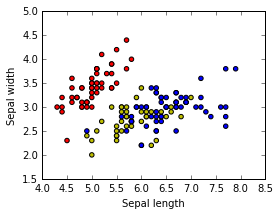

In [61]:
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features: length and width of the sepals
Y = iris.target

plt.figure(1, figsize=(4, 3))
colors = np.array(['r','y','b'])
plt.scatter(X[:, 0], X[:, 1], c=colors[Y])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

# Convert class vectors to binary class matrices

In [62]:
from keras.utils import np_utils 
Y_oh = np_utils.to_categorical(Y, 3) 
print Y[0:5]
print Y_oh[0:5]

[0 0 0 0 0]
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]


# Build the model

In [63]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.optimizers import SGD
output_dim = nb_classes = 3 
model = Sequential() 
model.add(Dense(3, input_dim=2, activation='relu')) 
model.add(Dense(output_dim, activation='softmax')) 
batch_size = 150
nb_epoch = 50000

# Compile and train the model



[INFO] training...
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Error while trying to plot losses...
'val_acc'
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=


KeyError: 'val_acc'

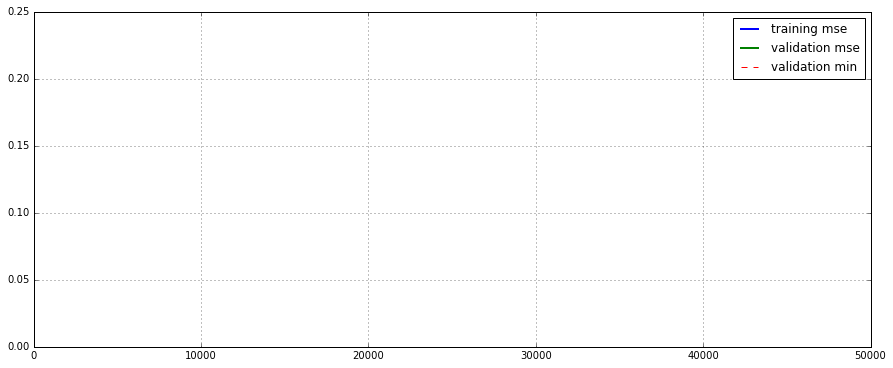

In [69]:
my_big_callback = TrainingPlotter(n=1, patience=10)

sgd = SGD(lr= 1e-3, decay=0e-6, momentum=0.9, nesterov=False)
model.compile(optimizer=sgd, loss='categorical_crossentropy') 
#model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy']) 

ploss = 0.25

fig = plt.figure(figsize=(15,6))
plt.ylim(0.0, ploss)
plt.xlim(0, nb_epoch)
plt.grid(True)

print("[INFO] training...")
try:
    history = model.fit(X, Y_oh, batch_size=batch_size, nb_epoch=nb_epoch,verbose=0,
                       validation_split=0.33, callbacks=[my_big_callback])
    #histo2 = model.fit(X_train, y_train, batch_size=128, nb_epoch=nepochs, 
    #                   verbose=0, validation_split=0.33, callbacks=[my_big_callback])
except KeyboardInterrupt:
    pass

loss = model.evaluate(X, Y_oh, verbose=0)
#print history.history
print 'loss:',loss


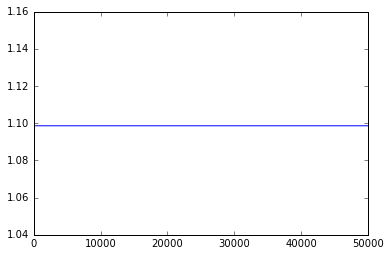

In [55]:
plt.plot(history.history['loss'])

In [46]:
W = model.get_weights()
print W

[array([[-0.12571892,  0.65432513,  2.11851501],
       [ 0.14080311,  1.00767887, -2.06319308]], dtype=float32), array([ 0.        ,  0.22367914, -3.30432129], dtype=float32), array([[-0.15520319,  0.89577699, -0.7600835 ],
       [ 0.67553252, -0.82448161, -0.35724622],
       [-3.54772639,  1.40206552,  1.94652188]], dtype=float32), array([ 0.90679318,  2.30247998, -3.2092557 ], dtype=float32)]


In [47]:
def getAccuracy(X,Y):
    Y_hat = model.predict_classes(X)
    print 'Y_hat:', Y_hat[:5]
    accuracy = sum(Y_hat == Y)/(float(len(Y)))
    return accuracy

train_ac = getAccuracy(X,Y)
print 
print 'Training Accuracy: ', train_ac


 32/150 [=====>........................] - ETA: 0sY_hat: [0 0 0 0 0]

Training Accuracy:  0.806666666667


38496/39501 [============================>.] - ETA: 0s

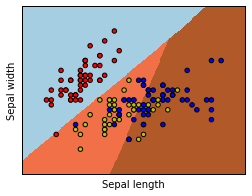

In [48]:
h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
colors = np.array(['r','y','b'])
plt.scatter(X[:, 0], X[:, 1], c=colors[Y])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()